Importing Library

In [1]:
from tika import parser
from itertools import groupby
import re
from nltk.corpus import stopwords
from textwrap import wrap
from os import listdir
from os.path import isfile, join
import pandas as pd
import gensim
from gensim.models import Doc2Vec
from nltk.tokenize import RegexpTokenizer

C:\Users\praveen ji\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Loading Dataset

In [16]:
df = pd.read_csv("resumeContent202.csv")

In [25]:
df.head(2)

,Unnamed: 0,content,resumePath
0,0,\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r...,C:\Users\praveen ji\Desktop\SH@dow\Data\Datum\...
1,1,\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r...,C:\Users\praveen ji\Desktop\SH@dow\Data\Datum\...


Cleaning and preparing data for doc2vec model

In [3]:
def cleaning(text):
    em = str(text).lower()
    #clean and tokenize document string
    _content  =em.split()
    word_list =[]
    for i in _content:
        word_list+= [i]
    
    return word_list

def preprocessing(text):
    #remove numbers 
    number_tokens =[re.sub(r'[\d]',' ',i) for i  in text]
    number_tokens = ' '.join(number_tokens).split()
    #stem tokens
    #strmmed_tokens = [p.stemmer.stem(i) for i in number_tokens]
    return number_tokens

In [4]:
labeledSentence = gensim.models.doc2vec.TaggedDocument
all_content =[]
texts =[]
j=0
k=0
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words("english"))
# p_stemmer = PorterStemmer()

for em in df.content:
    temp = cleaning(em)
    _resume = preprocessing(temp)
    
    #add tokens to list
    if _resume:
        all_content.append(labeledSentence(_resume,[j]))
        j+=1
        
    k+=1
    
print("Number of docs processed: ", k)
print("Number of non-empty docs processed: ", k)
        

Number of docs processed:  202
Number of non-empty docs processed:  202


In [5]:
#Making Model

In [6]:
d2v_model = Doc2Vec(all_content,size=100, window =1,min_count= 3,dm=1,alpha = 0.25,negative = 5)
d2v_model.train(all_content,total_examples=d2v_model.corpus_count, epochs=1000,start_alpha=0.002, end_alpha=0.016)

C:\Users\praveen ji\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


analysis

In [7]:
len(d2v_model.docvecs.doctag_syn0[0]) # one document is represented in one vector of 100 dimension

C:\Users\praveen ji\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.


100

Visulisation

In [10]:
from sklearn.cluster import KMeans
from __future__ import print_function

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

C:\Users\praveen ji\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until


For n_clusters = 2 The average silhouette_score is : 0.036306866


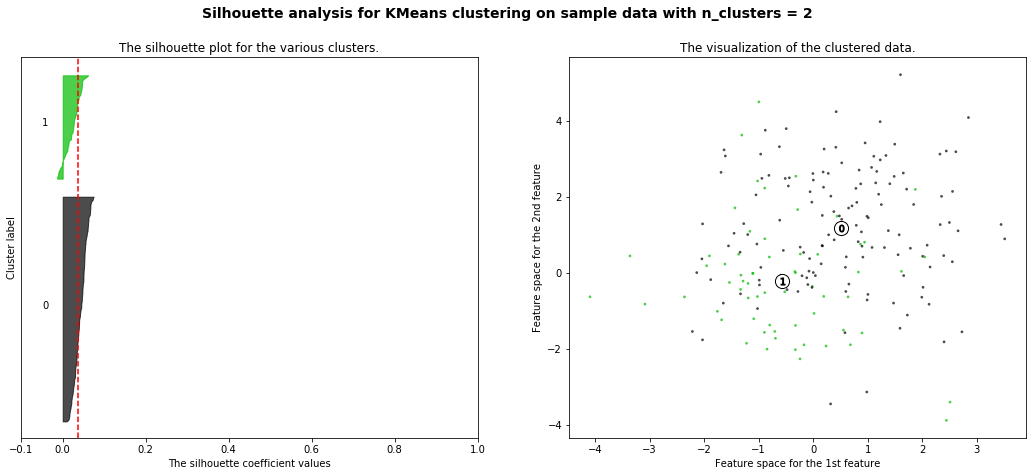

For n_clusters = 3 The average silhouette_score is : 0.026149925


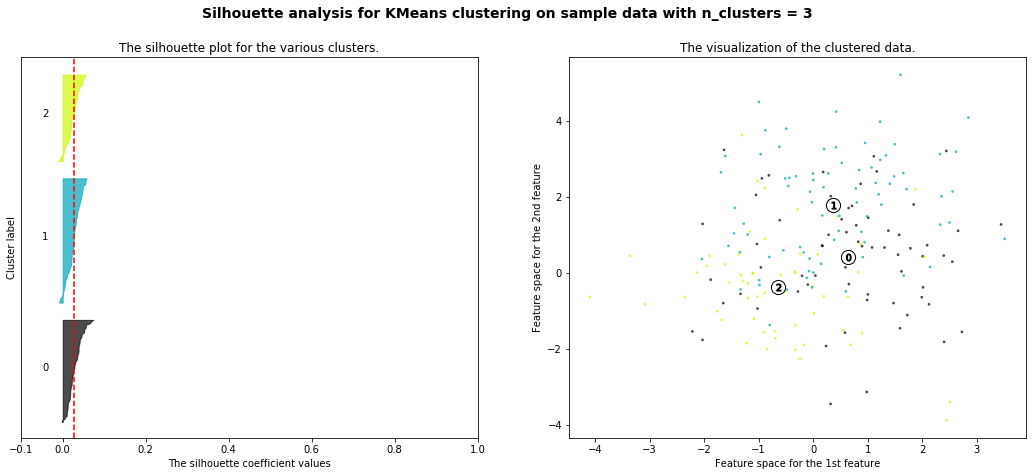

For n_clusters = 4 The average silhouette_score is : 0.020820256


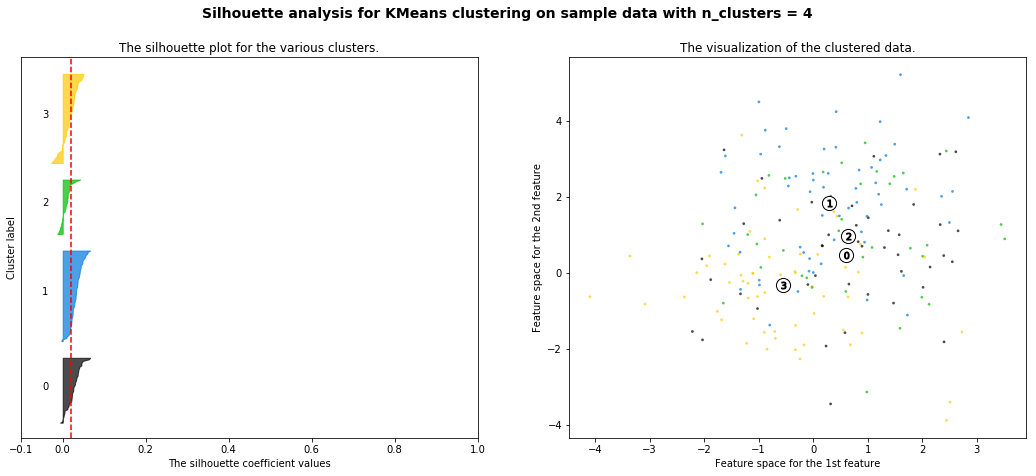

For n_clusters = 5 The average silhouette_score is : 0.019886741


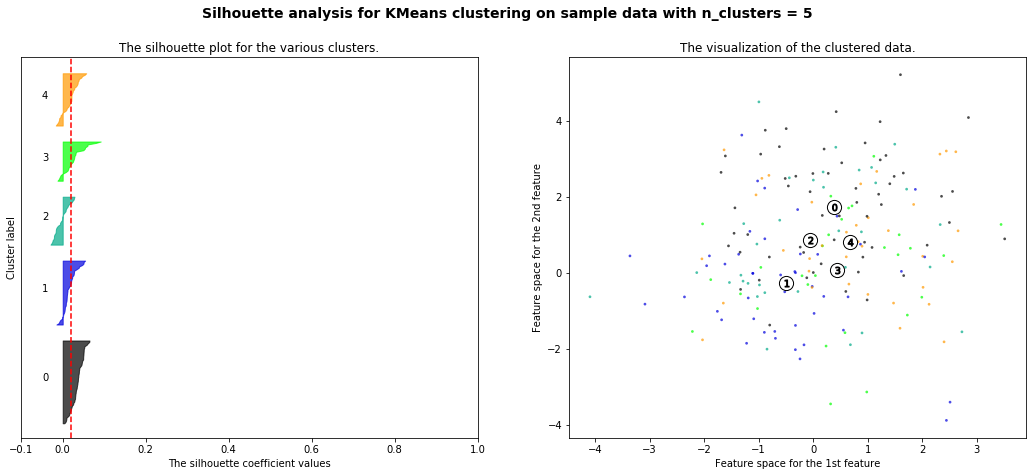

For n_clusters = 6 The average silhouette_score is : 0.016471159


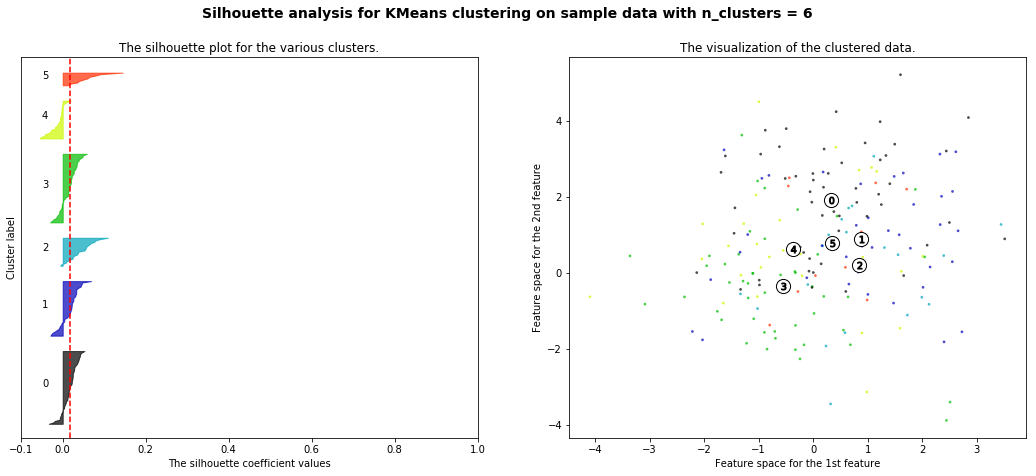

In [24]:
range_n_clusters = [2, 3, 4, 5, 6]

X= d2v_model.docvecs.doctag_syn0 #vectorized documents

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [26]:
#According to Sihouette Analysis c2 clusters will do good
clusterer = KMeans(n_clusters=2,init='k-means++',max_iter=1000, random_state=10)
cluster_labels = clusterer.fit_predict(X)

In [27]:
centroids = clusterer.cluster_centers_

In [71]:
Query ="Expertise in the areas of Staffing, Recruiting, Sourcing, Head Hunting, Team Handling, Reporting, Vendor Management, Sourcing, Interviewing , Campus Recruitment "

In [72]:
token = Query.split()
new_query_vector = d2v_model.infer_vector(token, steps=100)

In [75]:
from sklearn.metrics.pairwise import manhattan_distances, cosine_similarity

In [94]:
i=0
for centroid in centroids:
    print("manhattan distance for centrid", i, np.mean(sklearn.metrics.pairwise.manhattan_distances(centroid.reshape(-1,1),new_query_vector.reshape(-1,1))[0]))
    i+=1

manhattan distance for centrid 0 0.49463059940957466
manhattan distance for centrid 1 0.6016187282500323


so query is closer is closer to second centroid. hence only documents falling under second cluster should be taken into consideration for another round of ranking.

#To find ot similar document used while training doc2vec one can use function

In [102]:
# # doc2vec trained over 202 documents. Hence unique document id can range fomr 0-201. Whereas here in exaple we have chosen first document i.e. 0
# sims = d2v_model.docvecs.most_similar(0, topn=5) 

In [103]:
# sims